___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0 = pd.read_csv('Churn_Modelling.csv')
df = df0.copy()

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [6]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

RowNumber and CustomerId columns are special for every customer so we will drop them. And also the Surname column.

In [8]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [9]:
df.shape

(10000, 11)

In [10]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

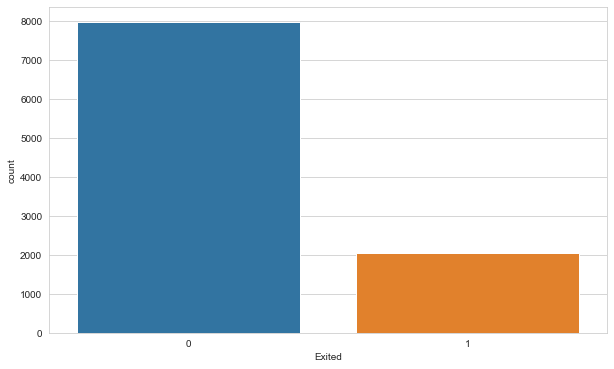

In [11]:
sns.countplot(x=df.Exited);

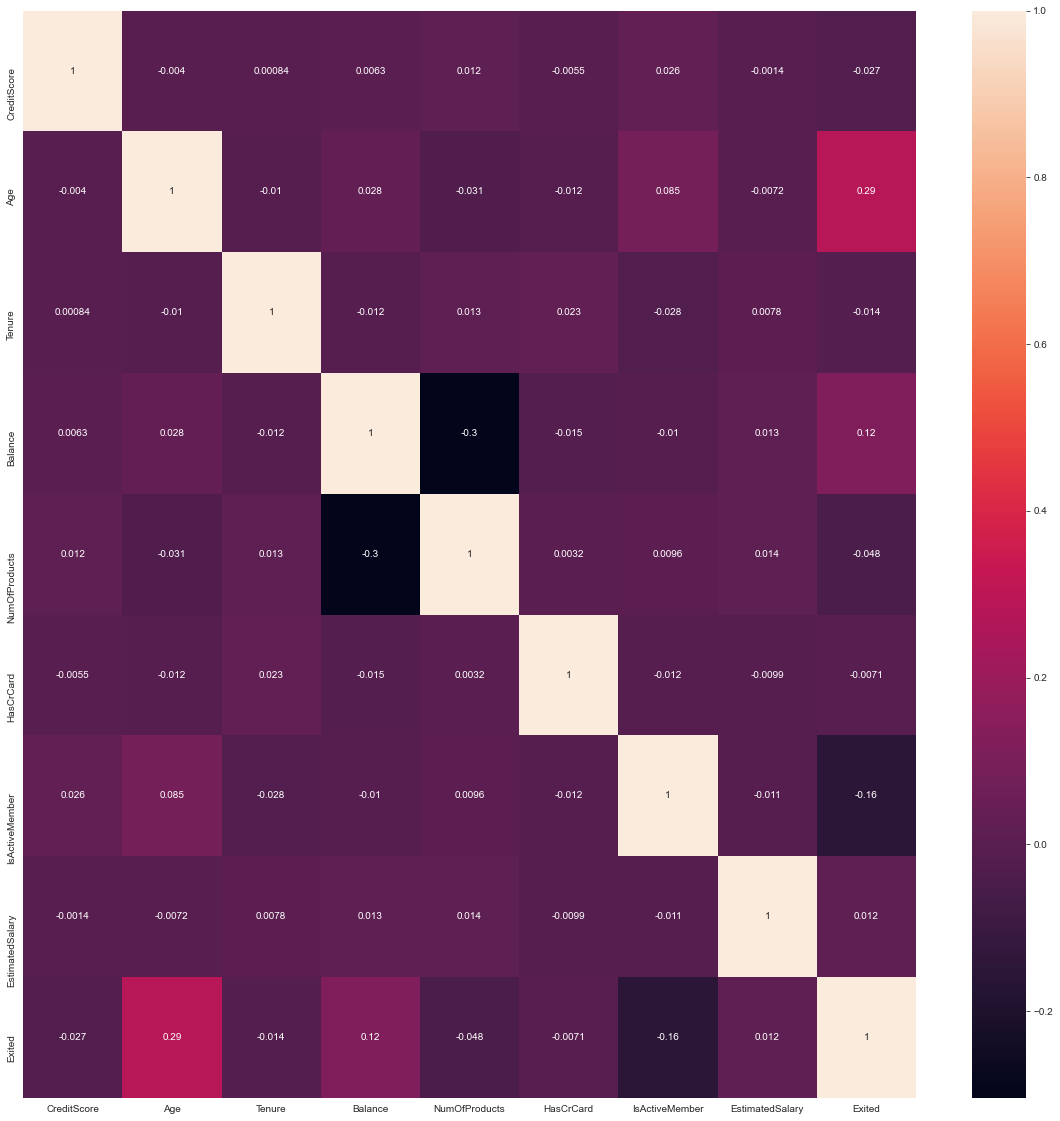

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

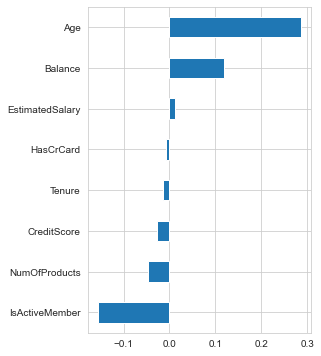

In [13]:
plt.figure(figsize = (4,6))
df.corr()['Exited'].sort_values().drop('Exited').plot(kind = "barh");

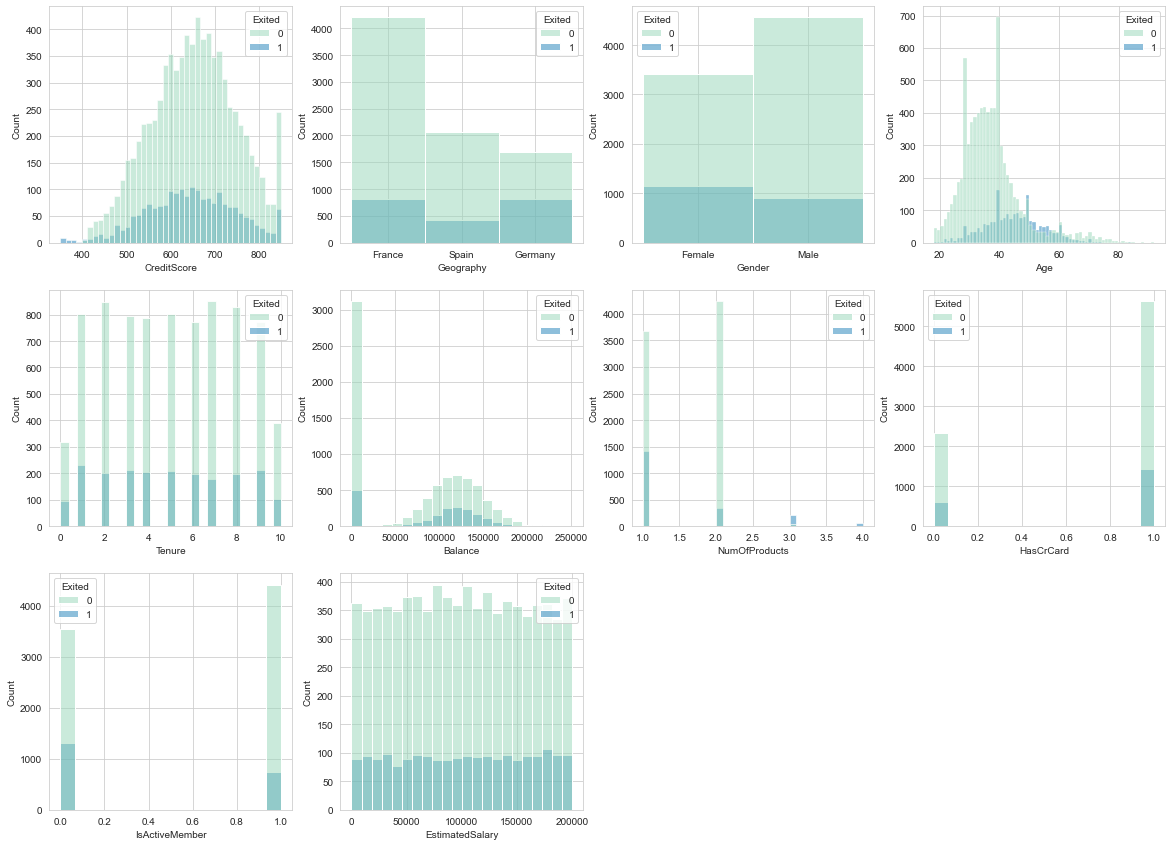

In [14]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Exited":
        index += 1
        plt.subplot(4,4,index)
        sns.histplot(hue='Exited',x=feature, data=df, palette="YlGnBu")

In [15]:
df = pd.get_dummies(df)

# Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = df.drop('Exited',axis=1)

In [18]:
y = df['Exited']

In [19]:
seed = 42

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.10, random_state=seed)

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [152]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [24]:
X_train.shape[1]

13

In [25]:
X_test.shape

(1000, 13)

In [26]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [27]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6160 - recall: 0.1362 - val_loss: 0.5076 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4991 - recall: 0.0000e+00 - val_loss: 0.4789 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4813 - recall: 0.0000e+00 - val_loss: 0.4619 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4694 - recall: 0.0182 - val_loss: 0.4487 - val_recall: 0.0884
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4605 - recall: 0.1029 - val_loss: 0.4394 - val_recall: 0.1436
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4504 - recall: 0.1047 - val_loss: 0.4273 - val_recall: 0.1436
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4393 - recall: 0.1416 - val_loss: 0.4148 - val_recall: 0.1713
Epoch 8/300
64/64 [==

64/64 [==============================] - 0s 2ms/step - loss: 0.3317 - recall: 0.4679 - val_loss: 0.2945 - val_recall: 0.5414
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3327 - recall: 0.4655 - val_loss: 0.2933 - val_recall: 0.5580
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3317 - recall: 0.4740 - val_loss: 0.2943 - val_recall: 0.5580
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3309 - recall: 0.4703 - val_loss: 0.2957 - val_recall: 0.5580
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3334 - recall: 0.4679 - val_loss: 0.2961 - val_recall: 0.6077
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3311 - recall: 0.4625 - val_loss: 0.2949 - val_recall: 0.5414
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3314 - recall: 0.4794 - val_loss: 0.2993 - val_recall: 0.5746
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.4867 - val_loss: 0.2911 - val_recall: 0.5635
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3212 - recall: 0.4909 - val_loss: 0.2911 - val_recall: 0.5525
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3210 - recall: 0.4891 - val_loss: 0.2956 - val_recall: 0.5967
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3237 - recall: 0.5036 - val_loss: 0.2920 - val_recall: 0.5083
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3218 - recall: 0.4897 - val_loss: 0.2998 - val_recall: 0.5470
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3214 - recall: 0.4855 - val_loss: 0.2911 - val_recall: 0.5359
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3237 - recall: 0.4903 - val_loss: 0.2921 - val_recall: 0.5525
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3168 - recall: 0.5085 - val_loss: 0.2921 - val_recall: 0.5691
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3156 - recall: 0.5042 - val_loss: 0.2910 - val_recall: 0.5249
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3152 - recall: 0.5079 - val_loss: 0.2928 - val_recall: 0.5912
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3150 - recall: 0.5115 - val_loss: 0.2957 - val_recall: 0.5967
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3163 - recall: 0.5054 - val_loss: 0.2927 - val_recall: 0.5138
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3144 - recall: 0.5079 - val_loss: 0.2911 - val_recall: 0.5525
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3138 - recall: 0.5067 - val_loss: 0.2903 - val_recall: 0.5691
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3106 - recall: 0.5176 - val_loss: 0.2968 - val_recall: 0.5028
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3126 - recall: 0.5115 - val_loss: 0.2941 - val_recall: 0.5912
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3104 - recall: 0.5194 - val_loss: 0.2959 - val_recall: 0.5801
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3107 - recall: 0.5151 - val_loss: 0.2970 - val_recall: 0.5249
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3104 - recall: 0.5169 - val_loss: 0.2958 - val_recall: 0.5470
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3109 - recall: 0.5121 - val_loss: 0.2972 - val_recall: 0.4972
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3122 - recall: 0.5145 - val_loss: 0.2969 - val_recall: 0.6298
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3085 - recall: 0.5163 - val_loss: 0.2967 - val_recall: 0.6133
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3080 - recall: 0.5182 - val_loss: 0.2977 - val_recall: 0.6133
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3083 - recall: 0.5224 - val_loss: 0.2975 - val_recall: 0.5635
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3081 - recall: 0.5309 - val_loss: 0.2969 - val_recall: 0.5083
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3069 - recall: 0.5285 - val_loss: 0.2979 - val_recall: 0.5249


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [29]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.616,0.136,0.508,0.000
1,0.499,0.000,0.479,0.000
2,0.481,0.000,0.462,0.000
3,0.469,0.018,0.449,0.088
4,0.460,0.103,0.439,0.144


<AxesSubplot:>

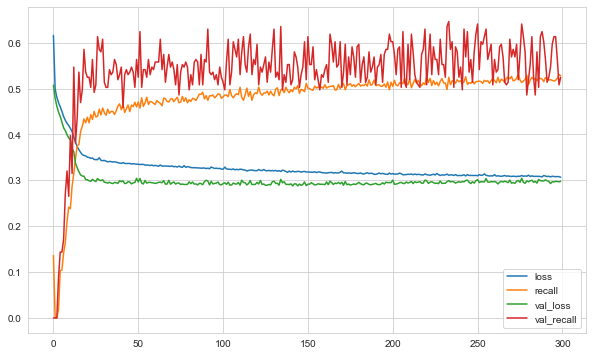

In [30]:
loss_df.plot()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [31]:
model.evaluate(X_test, y_test, verbose=0)

[0.3677591383457184, 0.5539215803146362]

In [32]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.3677591383457184
Recall :  0.5539215803146362


In [33]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 871us/step
[[722  74]
 [ 91 113]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       796
           1       0.60      0.55      0.58       204

    accuracy                           0.83      1000
   macro avg       0.75      0.73      0.74      1000
weighted avg       0.83      0.83      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [34]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [35]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [36]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1, class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.6795 - recall: 0.7415 - val_loss: 0.6999 - val_recall: 0.6906
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6499 - recall: 0.6344 - val_loss: 0.6480 - val_recall: 0.6685
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6261 - recall: 0.6277 - val_loss: 0.5945 - val_recall: 0.6740
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6076 - recall: 0.6816 - val_loss: 0.5598 - val_recall: 0.6409
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5920 - recall: 0.6901 - val_loss: 0.5606 - val_recall: 0.7072
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5775 - recall: 0.7016 - val_loss: 0.5062 - val_recall: 0.6354
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5623 - recall: 0.7064 - val_loss: 0.5485 - val_recall: 0.7680
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4575 - recall: 0.7669 - val_loss: 0.4358 - val_recall: 0.8398
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4576 - recall: 0.7676 - val_loss: 0.4352 - val_recall: 0.8343
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4551 - recall: 0.7730 - val_loss: 0.4525 - val_recall: 0.8453
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4552 - recall: 0.7682 - val_loss: 0.4496 - val_recall: 0.8453
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4567 - recall: 0.7669 - val_loss: 0.4604 - val_recall: 0.8453
Epoch 65/300
64/64 [==============================] - 0s 3ms/step - loss: 0.4537 - recall: 0.7718 - val_loss: 0.4054 - val_recall: 0.8011
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4561 - recall: 0.7694 - val_loss: 0.4871 - val_recall: 0.8564
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.4386 - recall: 0.7827 - val_loss: 0.4248 - val_recall: 0.8343
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4371 - recall: 0.7821 - val_loss: 0.4217 - val_recall: 0.8232
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4365 - recall: 0.7797 - val_loss: 0.4562 - val_recall: 0.8287
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4412 - recall: 0.7803 - val_loss: 0.3883 - val_recall: 0.7735
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4379 - recall: 0.7778 - val_loss: 0.4319 - val_recall: 0.8066
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4376 - recall: 0.7881 - val_loss: 0.4143 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4399 - recall: 0.7893 - val_loss: 0.3934 - val_recall: 0.7901
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4271 - recall: 0.7900 - val_loss: 0.4508 - val_recall: 0.8066
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4231 - recall: 0.7851 - val_loss: 0.4088 - val_recall: 0.7735
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4226 - recall: 0.7936 - val_loss: 0.4491 - val_recall: 0.8177
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4239 - recall: 0.7960 - val_loss: 0.4452 - val_recall: 0.8066
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4243 - recall: 0.7954 - val_loss: 0.3913 - val_recall: 0.7735
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4218 - recall: 0.7984 - val_loss: 0.4249 - val_recall: 0.8011
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4232 - recall: 0.7936 - val_loss: 0.4015 - val_recall: 0.7790
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4132 - recall: 0.8057 - val_loss: 0.3989 - val_recall: 0.7790
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4146 - recall: 0.7960 - val_loss: 0.4463 - val_recall: 0.8066
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4111 - recall: 0.8081 - val_loss: 0.4444 - val_recall: 0.8011
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4131 - recall: 0.8033 - val_loss: 0.3906 - val_recall: 0.7569
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4106 - recall: 0.7960 - val_loss: 0.4034 - val_recall: 0.7735
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4123 - recall: 0.8063 - val_loss: 0.3857 - val_recall: 0.7680
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4130 - recall: 0.7984 - val_loss: 0.4295 - val_recall: 0.8177
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4056 - recall: 0.8130 - val_loss: 0.4268 - val_recall: 0.8177
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4041 - recall: 0.8063 - val_loss: 0.4279 - val_recall: 0.7956
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4041 - recall: 0.8093 - val_loss: 0.4092 - val_recall: 0.7845
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4034 - recall: 0.8136 - val_loss: 0.3943 - val_recall: 0.7735
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4037 - recall: 0.8087 - val_loss: 0.4151 - val_recall: 0.7901


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                448       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.680,0.742,0.700,0.691
1,0.650,0.634,0.648,0.669
2,0.626,0.628,0.595,0.674
3,0.608,0.682,0.560,0.641
4,0.592,0.690,0.561,0.707


<AxesSubplot:>

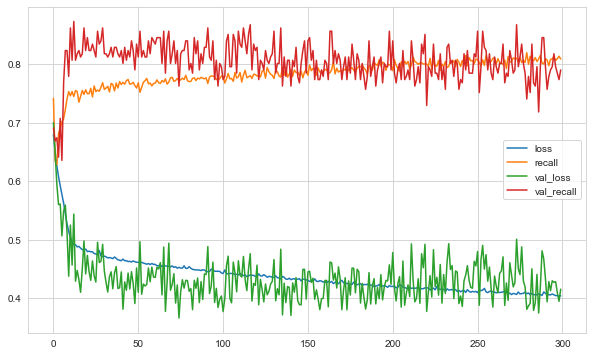

In [39]:
loss_df.plot()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [40]:
model.evaluate(X_test, y_test, verbose=0)

[0.5533095002174377, 0.8235294222831726]

In [41]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.5533095002174377
Recall :  0.8235294222831726


In [42]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 903us/step
[[568 228]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       796
           1       0.42      0.82      0.56       204

    accuracy                           0.74      1000
   macro avg       0.68      0.77      0.69      1000
weighted avg       0.84      0.74      0.76      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [43]:
from tensorflow.keras.optimizers import Adam

In [44]:
opt = Adam(lr = 0.005)

In [45]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [46]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1, class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6501 - recall: 0.6489 - val_loss: 0.6373 - val_recall: 0.7680
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5942 - recall: 0.6713 - val_loss: 0.6315 - val_recall: 0.8619
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5585 - recall: 0.7046 - val_loss: 0.5291 - val_recall: 0.8287
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5114 - recall: 0.7439 - val_loss: 0.5355 - val_recall: 0.8619
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5058 - recall: 0.7470 - val_loss: 0.3957 - val_recall: 0.7680
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4979 - recall: 0.7367 - val_loss: 0.4097 - val_recall: 0.7790
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4905 - recall: 0.7506 - val_loss: 0.4187 - val_recall: 0.8011
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4417 - recall: 0.7785 - val_loss: 0.4478 - val_recall: 0.8453
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4403 - recall: 0.7821 - val_loss: 0.4708 - val_recall: 0.8398
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4378 - recall: 0.7809 - val_loss: 0.4347 - val_recall: 0.8343
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4365 - recall: 0.7815 - val_loss: 0.4226 - val_recall: 0.8343
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4402 - recall: 0.7893 - val_loss: 0.4083 - val_recall: 0.8011
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4322 - recall: 0.7827 - val_loss: 0.4083 - val_recall: 0.7901
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4365 - recall: 0.7833 - val_loss: 0.4790 - val_recall: 0.8508
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.4165 - recall: 0.8039 - val_loss: 0.4591 - val_recall: 0.8398
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4089 - recall: 0.8136 - val_loss: 0.4723 - val_recall: 0.8122
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4066 - recall: 0.8075 - val_loss: 0.5049 - val_recall: 0.8287
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4162 - recall: 0.8051 - val_loss: 0.3659 - val_recall: 0.6961
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4092 - recall: 0.8123 - val_loss: 0.4552 - val_recall: 0.7790
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4098 - recall: 0.8039 - val_loss: 0.4633 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4100 - recall: 0.8172 - val_loss: 0.4625 - val_recall: 0.8011
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3917 - recall: 0.8245 - val_loss: 0.4594 - val_recall: 0.8011
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3893 - recall: 0.8275 - val_loss: 0.4611 - val_recall: 0.8287
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3912 - recall: 0.8269 - val_loss: 0.4485 - val_recall: 0.7901
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3879 - recall: 0.8160 - val_loss: 0.4939 - val_recall: 0.7956
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3942 - recall: 0.8111 - val_loss: 0.4441 - val_recall: 0.7735
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3865 - recall: 0.8251 - val_loss: 0.4472 - val_recall: 0.7956
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3856 - recall: 0.8232 - val_loss: 0.4426 - val_recall: 0.7680
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3737 - recall: 0.8402 - val_loss: 0.4256 - val_recall: 0.7238
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3772 - recall: 0.8360 - val_loss: 0.4911 - val_recall: 0.7845
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3783 - recall: 0.8317 - val_loss: 0.5086 - val_recall: 0.8066
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3756 - recall: 0.8269 - val_loss: 0.4390 - val_recall: 0.7514
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3674 - recall: 0.8329 - val_loss: 0.4540 - val_recall: 0.7459
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3748 - recall: 0.8366 - val_loss: 0.4535 - val_recall: 0.7514
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3734 - recall: 0.8293 - val_loss: 0.4796 - val_recall: 0.7735
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3623 - recall: 0.8390 - val_loss: 0.5035 - val_recall: 0.7956
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3648 - recall: 0.8462 - val_loss: 0.4731 - val_recall: 0.7790
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3611 - recall: 0.8456 - val_loss: 0.4716 - val_recall: 0.7624
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3583 - recall: 0.8529 - val_loss: 0.4873 - val_recall: 0.7293
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3646 - recall: 0.8456 - val_loss: 0.5364 - val_recall: 0.8122


In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                448       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.650,0.649,0.637,0.768
1,0.594,0.671,0.631,0.862
2,0.558,0.705,0.529,0.829
3,0.511,0.744,0.535,0.862
4,0.506,0.747,0.396,0.768


<AxesSubplot:>

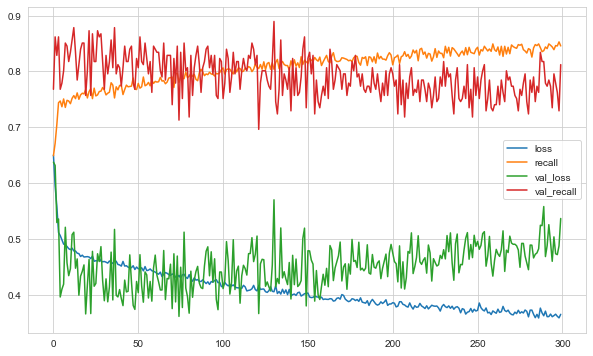

In [49]:
loss_df.plot()

In [50]:
model.evaluate(X_test, y_test, verbose=0)

[0.7003669142723083, 0.8382353186607361]

In [51]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.7003669142723083
Recall :  0.8382353186607361


In [52]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 807us/step
[[512 284]
 [ 33 171]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       796
           1       0.38      0.84      0.52       204

    accuracy                           0.68      1000
   macro avg       0.66      0.74      0.64      1000
weighted avg       0.82      0.68      0.71      1000



### Add Dropout Layer

In [88]:
from tensorflow.keras.layers import Dropout

In [105]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["Recall"])

In [106]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1, class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 4ms/step - loss: 0.6988 - recall: 0.5775 - val_loss: 0.6918 - val_recall: 0.5691
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6882 - recall: 0.5073 - val_loss: 0.6863 - val_recall: 0.4972
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6858 - recall: 0.4679 - val_loss: 0.6808 - val_recall: 0.4972
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6844 - recall: 0.4528 - val_loss: 0.6753 - val_recall: 0.4917
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6816 - recall: 0.4195 - val_loss: 0.6719 - val_recall: 0.5028
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6803 - recall: 0.4044 - val_loss: 0.6604 - val_recall: 0.4199
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6763 - recall: 0.4013 - val_loss: 0.6603 - val_recall: 0.5470
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.5478 - recall: 0.6798 - val_loss: 0.4713 - val_recall: 0.8177
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5455 - recall: 0.6780 - val_loss: 0.4477 - val_recall: 0.8122
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5478 - recall: 0.6659 - val_loss: 0.4980 - val_recall: 0.8564
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5466 - recall: 0.6822 - val_loss: 0.4757 - val_recall: 0.8287
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5517 - recall: 0.6792 - val_loss: 0.4659 - val_recall: 0.8177
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5489 - recall: 0.6810 - val_loss: 0.4573 - val_recall: 0.8122
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5482 - recall: 0.6586 - val_loss: 0.4583 - val_recall: 0.8232
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.5285 - recall: 0.6931 - val_loss: 0.4625 - val_recall: 0.8287
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5243 - recall: 0.7161 - val_loss: 0.4458 - val_recall: 0.8398
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5359 - recall: 0.6949 - val_loss: 0.4310 - val_recall: 0.8232
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5307 - recall: 0.6979 - val_loss: 0.4655 - val_recall: 0.8398
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5236 - recall: 0.7094 - val_loss: 0.4542 - val_recall: 0.8343
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5398 - recall: 0.7070 - val_loss: 0.4565 - val_recall: 0.8287
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5372 - recall: 0.6943 - val_loss: 0.4653 - val_recall: 0.8232
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.5319 - recall: 0.7070 - val_loss: 0.4397 - val_recall: 0.8287
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5292 - recall: 0.7113 - val_loss: 0.4442 - val_recall: 0.8287
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5289 - recall: 0.7076 - val_loss: 0.4585 - val_recall: 0.8287
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5233 - recall: 0.7300 - val_loss: 0.4382 - val_recall: 0.8287
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5282 - recall: 0.7137 - val_loss: 0.4370 - val_recall: 0.8287
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5206 - recall: 0.6961 - val_loss: 0.4439 - val_recall: 0.8287
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5318 - recall: 0.7337 - val_loss: 0.4322 - val_recall: 0.8232
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.5163 - recall: 0.7312 - val_loss: 0.4364 - val_recall: 0.8343
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5300 - recall: 0.7052 - val_loss: 0.4518 - val_recall: 0.8453
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5225 - recall: 0.7270 - val_loss: 0.4341 - val_recall: 0.8232
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5316 - recall: 0.7258 - val_loss: 0.4419 - val_recall: 0.8287
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5240 - recall: 0.7324 - val_loss: 0.4428 - val_recall: 0.8453
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5236 - recall: 0.7246 - val_loss: 0.4425 - val_recall: 0.8287
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5257 - recall: 0.7209 - val_loss: 0.4583 - val_recall: 0.8398
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.5260 - recall: 0.7040 - val_loss: 0.4470 - val_recall: 0.8398
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5300 - recall: 0.7088 - val_loss: 0.4541 - val_recall: 0.8398
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5188 - recall: 0.7052 - val_loss: 0.4407 - val_recall: 0.8343
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5194 - recall: 0.7288 - val_loss: 0.4430 - val_recall: 0.8508
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5279 - recall: 0.7203 - val_loss: 0.4565 - val_recall: 0.8674


In [107]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                448       
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                                 
 dense_35 (Dense)            (None, 1)                

In [108]:
df_los = pd.DataFrame(model.history.history)
df_los.head()

,loss,recall,val_loss,val_recall
0,0.699,0.577,0.692,0.569
1,0.688,0.507,0.686,0.497
2,0.686,0.468,0.681,0.497
3,0.684,0.453,0.675,0.492
4,0.682,0.419,0.672,0.503


<AxesSubplot:>

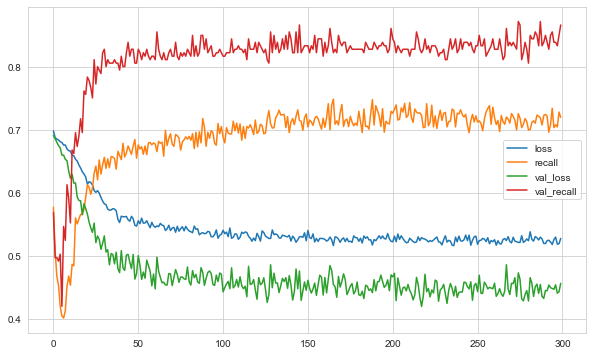

In [109]:
df_los.plot()

In [110]:
model.evaluate(X_test, y_test, verbose=0)

[0.5882750749588013, 0.8823529481887817]

In [111]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.5882750749588013
Recall :  0.8823529481887817


In [112]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 903us/step
[[489 307]
 [ 24 180]]
              precision    recall  f1-score   support

           0       0.95      0.61      0.75       796
           1       0.37      0.88      0.52       204

    accuracy                           0.67      1000
   macro avg       0.66      0.75      0.63      1000
weighted avg       0.83      0.67      0.70      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["Recall"])

In [64]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 40, restore_best_weights = True)

In [65]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop],class_weight=class_weights)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6618 - recall: 0.6719 - val_loss: 0.6242 - val_recall: 0.6575
Epoch 2/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.6123 - recall: 0.6671 - val_loss: 0.5563 - val_recall: 0.6740
Epoch 3/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5761 - recall: 0.6889 - val_loss: 0.5199 - val_recall: 0.7735
Epoch 4/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5403 - recall: 0.7409 - val_loss: 0.4979 - val_recall: 0.8287
Epoch 5/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5129 - recall: 0.7433 - val_loss: 0.4470 - val_recall: 0.7901
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4997 - recall: 0.7409 - val_loss: 0.4650 - val_recall: 0.8232
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4924 - recall: 0.7536 - val_loss: 0.4174 - val_recall: 0.8066
Epoch 8/1000
254/254

254/254 [==============================] - 0s 1ms/step - loss: 0.4457 - recall: 0.7597 - val_loss: 0.4272 - val_recall: 0.8343
Epoch 60/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4456 - recall: 0.7730 - val_loss: 0.4429 - val_recall: 0.8619
Epoch 60: early stopping


In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                448       
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [67]:
df_los = pd.DataFrame(model.history.history)
df_los.head()

,loss,recall,val_loss,val_recall
0,0.662,0.672,0.624,0.657
1,0.612,0.667,0.556,0.674
2,0.576,0.689,0.520,0.773
3,0.540,0.741,0.498,0.829
4,0.513,0.743,0.447,0.790


<AxesSubplot:>

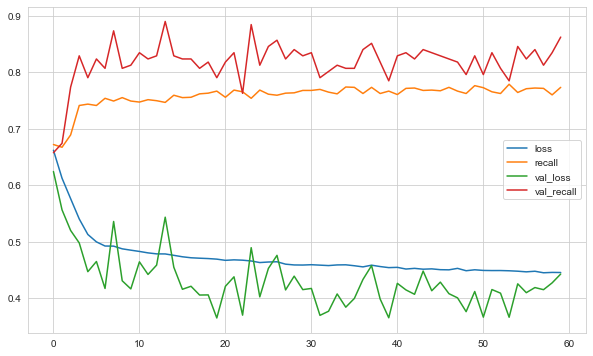

In [68]:
df_los.plot()

In [69]:
model.evaluate(X_test, y_test, verbose=0)

[0.48184725642204285, 0.7549019455909729]

In [70]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.48184725642204285
Recall :  0.7549019455909729


In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 936us/step
[[610 186]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.45      0.75      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



#### Monitor the "val_recall" as metric

In [72]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 40, restore_best_weights = True)

In [73]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["Recall"])

In [74]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop],class_weight=class_weights)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6618 - recall: 0.6719 - val_loss: 0.6242 - val_recall: 0.6575
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6123 - recall: 0.6671 - val_loss: 0.5563 - val_recall: 0.6740
Epoch 3/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5761 - recall: 0.6889 - val_loss: 0.5199 - val_recall: 0.7735
Epoch 4/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5403 - recall: 0.7409 - val_loss: 0.4979 - val_recall: 0.8287
Epoch 5/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5129 - recall: 0.7433 - val_loss: 0.4470 - val_recall: 0.7901
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4997 - recall: 0.7409 - val_loss: 0.4650 - val_recall: 0.8232
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4924 - recall: 0.7536 - val_loss: 0.4174 - val_recall: 0.8066
Epoch 8/1000
254/254

In [75]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                448       
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [76]:
df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,recall,val_loss,val_recall
0,0.662,0.672,0.624,0.657
1,0.612,0.667,0.556,0.674
2,0.576,0.689,0.520,0.773
3,0.540,0.741,0.498,0.829
4,0.513,0.743,0.447,0.790


<AxesSubplot:>

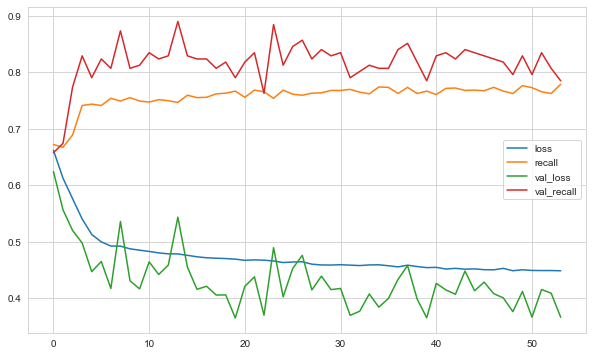

In [77]:
df_loss.plot()

In [78]:
model.evaluate(X_test, y_test, verbose=0)

[0.7186183929443359, 0.9166666865348816]

In [79]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", Recall)

loss :  0.7186183929443359
Recall :  0.9166666865348816


In [80]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 936us/step
[[448 348]
 [ 17 187]]
              precision    recall  f1-score   support

           0       0.96      0.56      0.71       796
           1       0.35      0.92      0.51       204

    accuracy                           0.64      1000
   macro avg       0.66      0.74      0.61      1000
weighted avg       0.84      0.64      0.67      1000



## GridSearchCV

In [81]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [82]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [129]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [130]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 15, restore_best_weights = True)

In [131]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop],class_weight = class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
254/254 [==============================] - 1s 2ms/step - loss: 0.6949 - recall: 0.9068 - val_loss: 0.7353 - val_recall: 0.8950
Epoch 2/200
254/254 [==============================] - 0s 2ms/step - loss: 0.6948 - recall: 0.9062 - val_loss: 0.7348 - val_recall: 0.8950
Epoch 3/200
254/254 [==============================] - 0s 2ms/step - loss: 0.6946 - recall: 0.9050 - val_loss: 0.7343 - val_recall: 0.8950
Epoch 4/200
254/254 [==============================] - 0s 1ms/step - loss: 0.6945 - recall: 0.9031 - val_loss: 0.7339 - val_recall: 0.8950
Epoch 5/200
254/254 [==============================] - 0s 2ms/step - loss: 0.6943 - recall: 0.9031 - val_loss: 0.7334 - val_recall: 0.8950
Epoch 6/200
254/254 [==============================] - 0s 2ms/step - loss: 0.6942 - recall: 0.9001 - val_loss: 0.7330 - val_recall: 0.8950
Epoch 7/200
254/254 [==============================] - 0s 2ms/step - loss: 0.6941 - recall: 0.9001 - val

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000017EF258FF70>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [132]:
grid_model.best_score_

0.9058988021367812

In [133]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.adadelta.Adadelta}

In [134]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
2,0.906,0.011,1,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
18,0.906,0.011,1,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
14,0.906,0.011,1,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
6,0.905,0.010,4,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
22,0.905,0.010,4,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
10,0.903,0.010,6,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
21,0.891,0.018,7,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
17,0.879,0.034,8,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
23,0.873,0.034,9,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
19,0.870,0.015,10,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."


In [135]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 903us/step
[[ 71 725]
 [ 24 180]]
              precision    recall  f1-score   support

           0       0.75      0.09      0.16       796
           1       0.20      0.88      0.32       204

    accuracy                           0.25      1000
   macro avg       0.47      0.49      0.24      1000
weighted avg       0.64      0.25      0.19      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [156]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve


32/32 [==============================] - 0s 936us/step


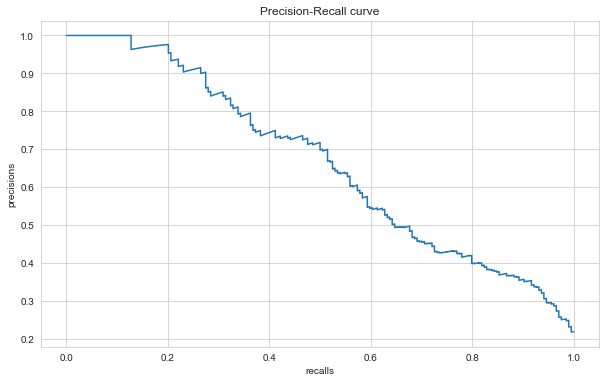

In [168]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [169]:
average_precision_score(y_test, y_pred_proba)

0.6650874994848799

### for gridsearchcv model

32/32 [==============================] - 0s 968us/step


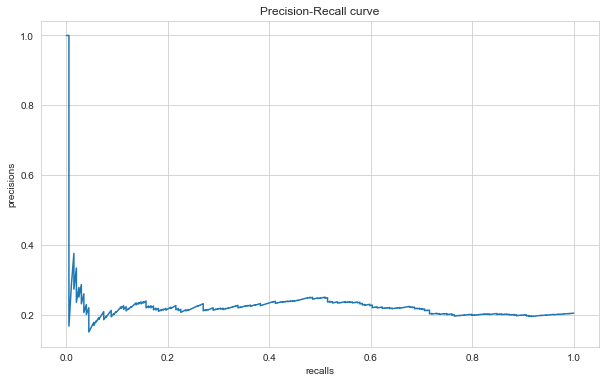

In [153]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [163]:
roc_auc_score(y_test, y_pred_proba)

0.5245467533747167

In [165]:
average_precision_score(y_test, y_pred_proba)

0.22377327013585196

# Final Model and Model Deployment

In [170]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [171]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [172]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 40, restore_best_weights = True)

In [173]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop],class_weight=class_weights)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6618 - recall: 0.6719 - val_loss: 0.6242 - val_recall: 0.6575
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6123 - recall: 0.6671 - val_loss: 0.5563 - val_recall: 0.6740
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5761 - recall: 0.6889 - val_loss: 0.5199 - val_recall: 0.7735
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5403 - recall: 0.7409 - val_loss: 0.4979 - val_recall: 0.8287
Epoch 5/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5129 - recall: 0.7433 - val_loss: 0.4470 - val_recall: 0.7901
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4997 - recall: 0.7409 - val_loss: 0.4650 - val_recall: 0.8232
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4924 - recall: 0.7536 - val_loss: 0.4174 - val_recall: 0.8066
Epoch 8/1000
254/254

In [174]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                448       
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 8)                 136       
                                                                 
 dense_55 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [175]:
df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,recall,val_loss,val_recall
0,0.662,0.672,0.624,0.657
1,0.612,0.667,0.556,0.674
2,0.576,0.689,0.520,0.773
3,0.540,0.741,0.498,0.829
4,0.513,0.743,0.447,0.790


<AxesSubplot:>

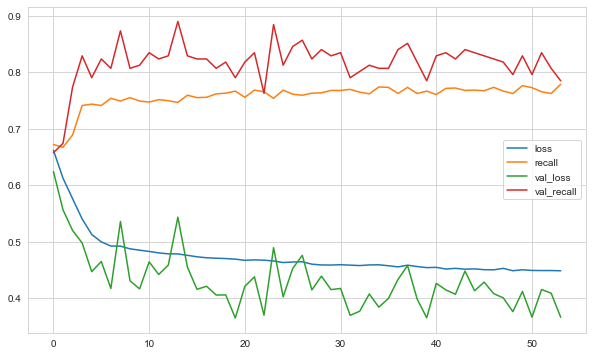

In [176]:
df_loss.plot()

In [177]:
model.evaluate(X_test, y_test, verbose=0)

[0.7186183929443359, 0.9166666865348816]

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___